<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Unsupervised_Learning/Image%20Compression%20with%20SVD/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Singular Value Decomposition (SVD) Implementation

##Introduction
This is a brief and simple example of SVD on black and white images. **Singular Value Decomposition (SVD)** is a matrix factorization technique that decomposes a matrix into three smaller matrices: \( U \), \( \Sigma \), and \( V^T \). In the context of image compression, SVD is applied to the image matrix, where the image is represented as a matrix of pixel values. By keeping only the largest singular values in \( \Sigma \) and corresponding vectors in \( U \) and \( V^T \), we can reduce the size of the matrix while retaining most of the image's important features. This results in a compressed image with minimal loss of quality, as the smaller singular values (which represent less important information) are discarded.

## Imports and Implementation

This code prompts the user to upload a file from their computer (if using google colab). An image of a hibiscus flower has been provided in the directory, or feel free to use your own.

Saving hibiscus.webp to hibiscus.webp


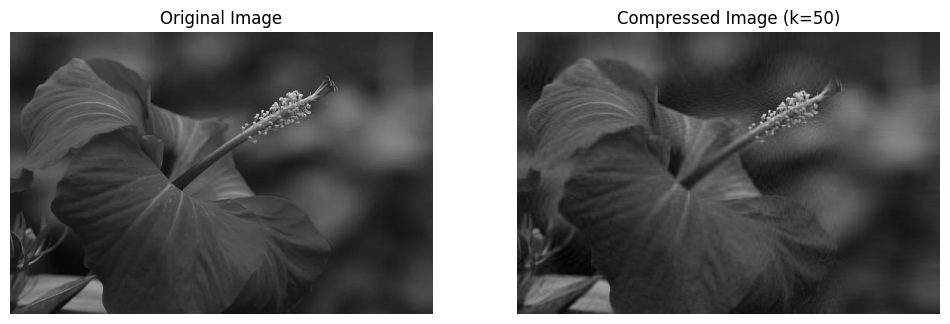

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from skimage import color, io
from google.colab import files

# Prompt user to upload a file
uploaded = files.upload()

# Get the file name from the uploaded file
image_path = list(uploaded.keys())[0]

# Load the image
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = svd(gray_image, full_matrices=False)

# Choose the number of singular values to retain for compression (e.g., 50)
k = 50
S_reduced = np.diag(S[:k])  # Keep the first k singular values
U_reduced = U[:, :k]        # Keep the first k columns of U
Vt_reduced = Vt[:k, :]      # Keep the first k rows of Vt

# Reconstruct the image using the reduced SVD matrices
compressed_image = np.dot(U_reduced, np.dot(S_reduced, Vt_reduced))

# Plot original and compressed images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(compressed_image, cmap='gray')
axes[1].set_title(f'Compressed Image (k={k})')
axes[1].axis('off')

plt.show()



## Results Visualization

In the images above, it is easy to tell that both are pictures of a flower. The right hand is blurry but still ientifiable with only 50 values retained for compression!

Below, let's look at the image with a few different values of k to compare.

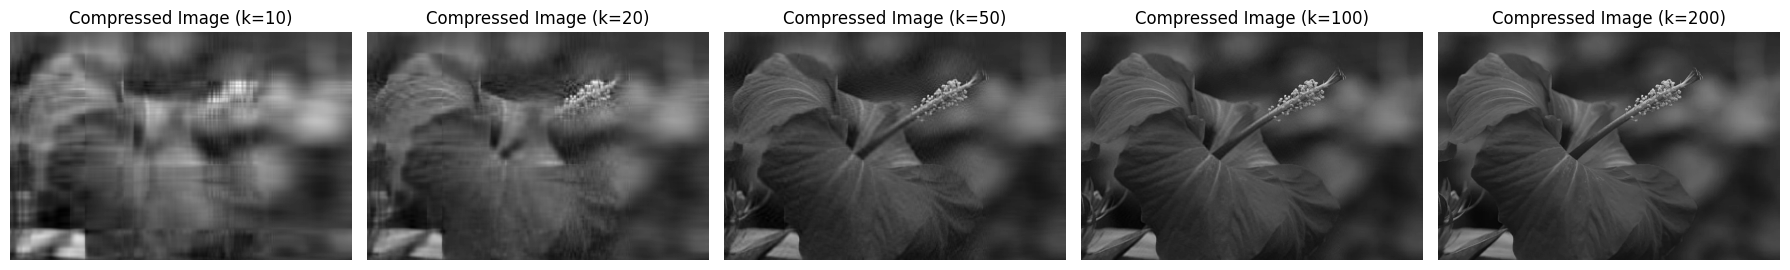

In [2]:
k_values = [10, 20, 50, 100, 200]
fig, axes = plt.subplots(1, len(k_values), figsize=(18, 6))

for i, k in enumerate(k_values):
    # Reduce the SVD components by keeping the first k values
    S_reduced = np.diag(S[:k])  # Keep the first k singular values
    U_reduced = U[:, :k]        # Keep the first k columns of U
    Vt_reduced = Vt[:k, :]      # Keep the first k rows of Vt

    # Reconstruct the image using the reduced SVD matrices
    compressed_image = np.dot(U_reduced, np.dot(S_reduced, Vt_reduced))

    # Plot the compressed image
    axes[i].imshow(compressed_image, cmap='gray')
    axes[i].set_title(f'Compressed Image (k={k})')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

It appears that only when k=10 does the image really become unrecognizable, which is surprising given how much data is dropped in compression. At k = 20, it's reasonably easy to tell this is an image of a flower. At k = 50, the image is barely blurry, and at k = 100 we can hardly tell the compressed image from the original! Image compression is a useful application of SVD for conveying lots of visual information without a lot of data space.